  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

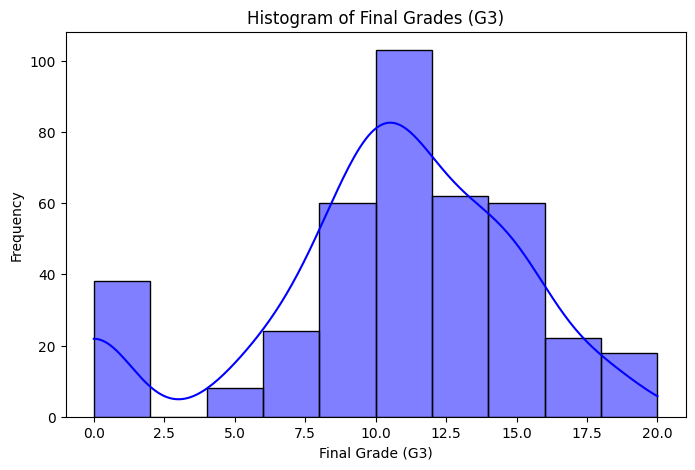

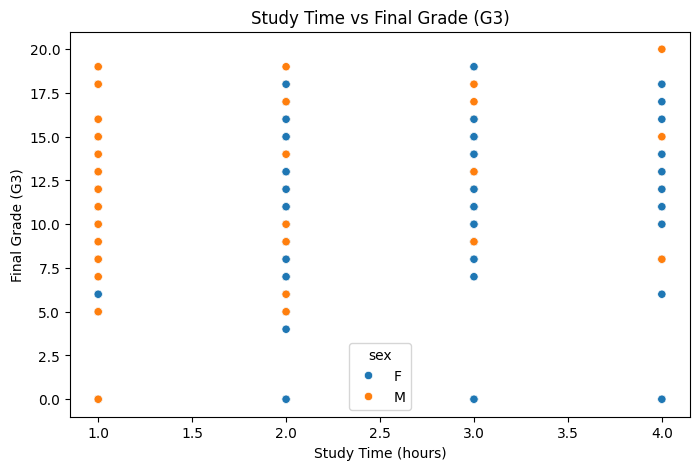

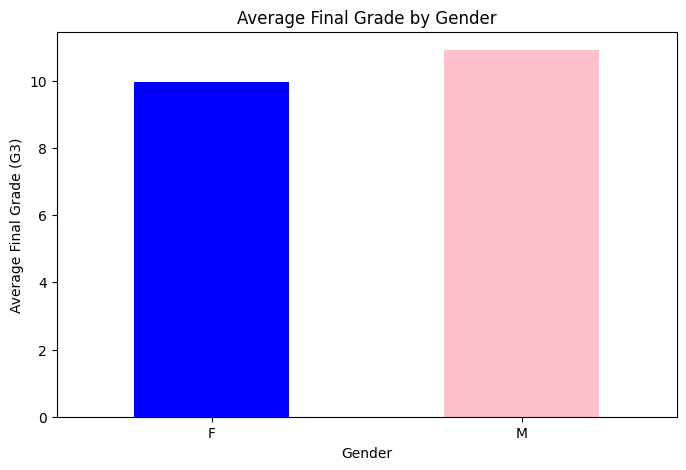

In [5]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Extracting Data set
with zipfile.ZipFile("student.zip", "r") as zip_ref:
    zip_ref.extractall(".")
    
# Step 1: Load Dataset
file_path = 'student-mat.csv'
data = pd.read_csv(file_path, sep=';')

# Display the first few rows
print(data.head())
# Check data types
print(data.info())


# Step 2: Data Exploration
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Display column data types
print("\nColumn Data Types:\n", data.dtypes)

# Dataset size
print("\nDataset Shape:", data.shape)

# Step 3: Data Cleaning
# Handle missing values (replace with median or remove rows)
data.fillna(data.median(numeric_only=True), inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify cleaning
print("\nDataset Shape After Cleaning:", data.shape)

# Step 4: Data Analysis Questions
# Q1. Average score in math (G3)
average_g3 = data["G3"].mean()
print("\nAverage Final Grade (G3):", average_g3)

# Q2. Count of students scoring above 15 in final grade (G3)
students_above_15 = len(data['G3'] > 15)
print("Students Scoring Above 15 in G3:", students_above_15)

# Q3. Correlation between study time and final grade
correlation = data['studytime'].corr(data['G3'])
print("\nCorrelation Between Study Time and Final Grade (G3):", correlation)

# Q4. Gender with higher average final grade
average_g3_gender = data.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:\n", average_g3_gender)

# Step 5: Data Visualization
# 1. Histogram of final grades (G3)
plt.figure(figsize=(8, 5))
sns.histplot(data['G3'], bins=10, kde=True, color='blue')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of study time vs final grade
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=data, hue='sex')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours)')
plt.ylabel('Final Grade (G3)')
plt.show()

# 3. Bar chart comparing male and female average grades
plt.figure(figsize=(8, 5))
average_g3_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.show()